<a target="_blank" href="https://colab.research.google.com/github/taobrienlbl/advanced_earth_science_data_analysis/blob/fall_2025_iub/content/lessons/03_data_science_modules/03_winter_temperature_enso.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Work-along: El Nino and IN Winter Temperatures

This notebook examines the relationship between winter minimum temperatures in southern central IN and El Nino.

**Goal:** examine the relationship between El Nino and minimum winter (Dec-Jan-Feb) temperatures in Bloomington, IN

<div style="max-width:720px"><div style="position:relative;padding-bottom:56.25%"><iframe id="kaltura_player" src='https://cdnapisec.kaltura.com/p/1751071/embedPlaykitJs/uiconf_id/55382703?iframeembed=true&amp;entry_id=1_sovpwyf8&amp;config%5Bprovider%5D=%7B%22widgetId%22%3A%221_hcj1au9f%22%7D&amp;config%5Bplayback%5D=%7B%22startTime%22%3A0%7D'  allowfullscreen webkitallowfullscreen mozAllowFullScreen allow="autoplay *; fullscreen *; encrypted-media *" sandbox="allow-downloads allow-forms allow-same-origin allow-scripts allow-top-navigation allow-pointer-lock allow-popups allow-modals allow-orientation-lock allow-popups-to-escape-sandbox allow-presentation allow-top-navigation-by-user-activation" title="EAS-G 690 - Week 3 - ENSO and Tmin" style="position:absolute;top:0;left:0;width:100%;height:100%;border:0"></iframe></div></div>

```{note}
Click [here](https://iu.mediaspace.kaltura.com/media/t/1_sovpwyf8) if the above video has issues playing.
```

**Method:**

 * obtain minimum temperature data from [NOAA NClimDiv](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00005), using the *NCEI Direct Download* method
 * read the dataset using `pandas`, filter out data for southern central Indiana
 * convert the data to timeseries format
 * obtain the [ENSO longitude index](https://cascade.lbl.gov/enso-longitude-index-eli/) Excel file and read with `pandas`; convert to timeseries format
 * make the ENSO and NClimDiv timeseries align (same start and end dates, same period - DJF, etc)
 * plot both timeseries
 * plot a scatter plot
 * do linear regression and correlation analyses

For this solution notebook, I will be using data directly from NOAA instead of downloading it, since `pandas` has the ability to open data from a URL.

```{attention}
If you have difficulty accessing the NOAA data site (which happened during class), you can download the two data files referenced in the video below.
```

 * [climdiv-tmindv-v1.0.0-20250905](https://raw.githubusercontent.com/taobrienlbl/advanced_earth_science_data_analysis/refs/heads/fall_2025_iub/content/lessons/03_data_science_modules/climdiv-tmindv-v1.0.0-20250905)
 * [divisional-readme.txt](https://github.com/taobrienlbl/advanced_earth_science_data_analysis/raw/refs/heads/fall_2025_iub/content/lessons/03_data_science_modules/divisional-readme.txt)

## Part 1: Getting the NClimDiv data (workalong)

```{attention}
Download this notebook and place it in your course folder, running it in Visual Studio Code (not Google Colab).  You'll commit this to your git repository at the end.
```

In [3]:
""" Import libraries """
import numpy as np
import matplotlib.pyplot as plt
import scipy
import pandas as pd

In [ ]:
""" Read the tmin data file. """
# set the file path
tmin_file_path = 'climdiv-tmindv-v1.0.0-20250905.txt'

# read the file with pandas
tmin_file_pd = pd.read_fwf(tmin_file_path,delim_whitespace=True, header = None)

# show the contents
tmin_file_pd.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,101281895,27.5,21.8,37.4,47.8,54.7,63.5,66.5,65.9,63.1,37.9,37.4,30.6
1,101281896,30.3,32.6,36.6,52.2,61.1,63.6,68.7,67.1,57.2,44.8,40.1,31.2
2,101281897,26.8,37.4,45.1,47.0,52.4,64.7,68.0,65.2,59.0,48.8,36.5,32.9
3,101281898,34.7,31.0,45.1,42.7,57.4,66.0,68.5,67.1,63.0,47.0,34.5,28.0
4,101281899,28.8,22.2,38.8,47.8,61.2,65.1,66.9,68.3,56.8,50.7,40.3,28.9


In [6]:
""" Filter out south central Indiana. """

# extract column 0 which has the format SSDDCCYYYY where SS is the state code, DD is the division code and CYYY is the year
column_0 = tmin_file_pd[0].astype(str)

# find rows with state code 12 (indiana) and division code 8 (south central) in column 0
indiana_south_central_rows = column_0.str.contains(r"^1208")

# select those rows from the pandas object
filtered_tmin = tmin_file_pd[indiana_south_central_rows]

# show the contents
filtered_tmin.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
10873,1208281895,14.5,11.1,28.5,42.8,50.1,61.6,61.8,62.1,56.9,33.6,31.6,25.8
10874,1208281896,22.8,23.5,26.5,47.8,56.6,59.7,64.9,62.1,52.8,37.7,34.4,27.0
10875,1208281897,17.8,25.4,33.3,40.8,45.1,58.4,65.6,60.3,53.6,45.3,32.6,25.8
10876,1208281898,26.0,23.8,36.2,38.8,53.1,61.5,64.9,63.9,58.8,45.0,28.8,20.6
10877,1208281899,20.7,12.7,29.4,43.9,55.1,62.8,63.0,64.4,53.1,46.5,36.1,21.4


C:\Users\yejin\AppData\Local\Temp\ipykernel_275708\4240651824.py:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_vector = pd.date_range(start='1895-01', end='2026-01', freq='M')


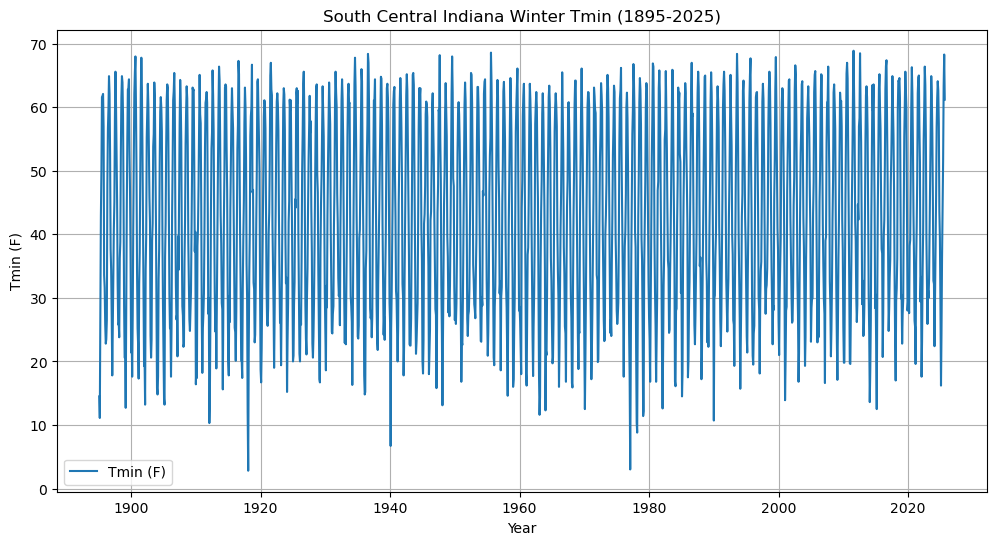

In [21]:
""" Convert the dataset to a timeseries. """

# extract the temperature values (columns 1 through 12) as a numpy array (rows are year)
tmin_values = filtered_tmin.iloc[:,1:13].to_numpy()


# ravel the temperature values to create a timeseries
tmin_timeseries = tmin_values.ravel()

# deal with missing values (these are coded as 99.90 in the dataset)
missing_value = 99.90
tmin_timeseries = np.where(tmin_timeseries == missing_value, np.nan, tmin_timeseries)

# create a corresponding time vector from Jan 1895 to Dec 2025
time_vector = pd.date_range(start='1895-01', end='2026-01', freq='M')

# plot the values
plt.figure(figsize=(12,6))
plt.plot(time_vector, tmin_timeseries,label="Tmin (F)", color='tab:blue')
plt.title("South Central Indiana Winter Tmin (1895-2025)")
plt.xlabel("Year")
plt.ylabel("Tmin (F)")
plt.grid()
plt.legend()
plt.show()

C:\Users\yejin\AppData\Local\Temp\ipykernel_275708\2381642952.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  tmin_djf = pd.Series(tmin_djf, index=time_vector_djf).resample('Y').mean()


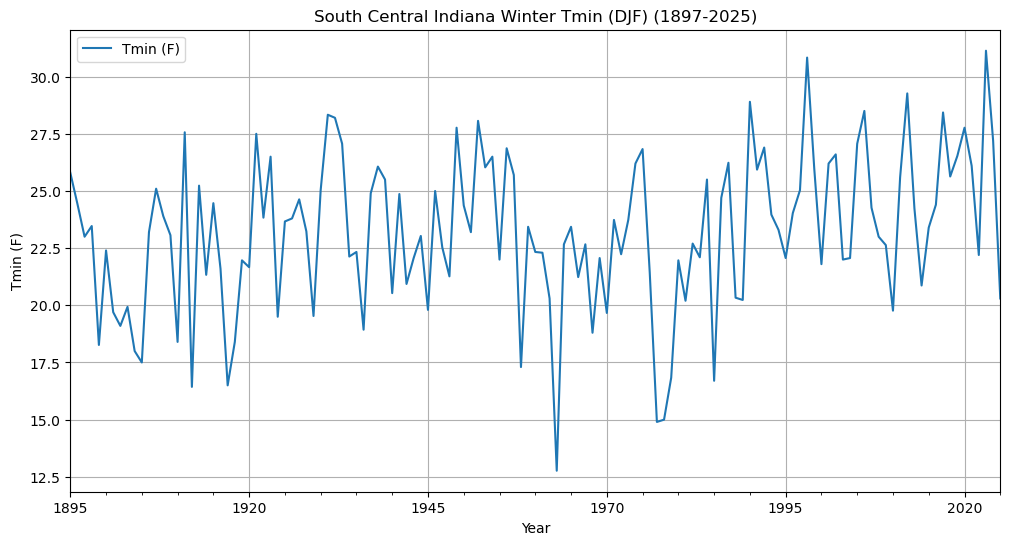

In [ ]:
""" Select and average over winter times (DJF). """

# find dates that are in December, January and Feburuary
in_djf = time_vector.month.isin([12,1,2])

# remove the first two values 
tmin_djf = tmin_timeseries[in_djf][2:]
time_vector_djf = time_vector[in_djf][2:]

# group by year (dealing with the fact that December will have a different year than Jan and Feb, and deal with NaNs)
tmin_djf = pd.Series(tmin_djf, index=time_vector_djf).resample('Y').mean()

# plot the timeseries
tmin_djf.plot(figsize=(12,6), label="Tmin (F)", color='tab:blue')
plt.title("South Central Indiana Winter Tmin (DJF) (1897-2025)")
plt.xlabel("Year")
plt.ylabel("Tmin (F)")
plt.grid()
plt.legend()
plt.show()

## Part 2: Reading and opening El Nino data

```{attention}
Work in groups on your own from this point forward.
```

In [58]:


# read in the data
""" Read the tmin data file. """
# set the file path
tmin_file_path = 'climdiv-tmindv-v1.0.0-20250905.txt'

# read the file with pandas
tmin_file_pd = pd.read_fwf(tmin_file_path,delim_whitespace=True, header = None)

# show the contents
#tmin_file_pd.head()

# Read the ENSO data file, the data is in the sheet named "ELI_ERSSTv5_1854.01-2020.02" in this sheet, A2:A13 are months Jan to Dec, B1:FL1 ARE years 1854 to 2020 and the data is from B2:FL13
# set the file path 
ENSO_file_path = 'ELI_ERSSTv5_1854.01-2020.05.xlsx'
# read the file with pandas
ENSO_data = pd.read_excel(ENSO_file_path, sheet_name='ELI_ERSSTv5_1854.01-2020.02', header=None)


# show the contents
ENSO_data.head()

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
0,NaN,1854.00,1855.00,1856.00,1857.00,1858.00,1859.00,1860.00,1861.00,1862.00,...,2011.00,2012.00,2013.00,2014.00,2015.00,2016.00,2017.00,2018.00,2019.00,2020.00
1,Jan,158.62,156.95,163.24,151.52,164.42,158.76,156.20,159.05,155.27,...,150.93,152.95,155.70,157.64,160.75,175.10,155.08,154.20,160.23,158.67
2,Feb,159.30,159.96,158.84,154.36,167.38,154.50,153.08,178.75,156.26,...,150.42,153.97,154.62,157.65,160.22,172.86,156.50,154.15,163.96,158.26
3,Mar,154.63,155.97,158.07,150.68,154.81,157.37,161.36,172.58,159.08,...,146.19,153.88,147.89,158.11,161.58,164.78,158.90,151.16,161.35,155.82
4,Apr,154.60,154.78,150.77,147.31,162.29,154.51,152.08,151.74,151.58,...,146.99,158.13,148.63,154.01,164.81,155.91,156.11,152.29,157.37,152.13


hint: use the `merge()` method in pandas to get the ELI and NOAA data to align.

In [59]:
""" Filter out south central Indiana. """

# extract column 0 which has the format SSDDCCYYYY where SS is the state code, DD is the division code and CYYY is the year
column_0 = tmin_file_pd[0].astype(str)

# find rows with state code 12 (indiana) division code 8 (south central), and elements code 28 (Min temperature) in column 0,
indiana_south_central_rows = column_0.str.contains(r"^120828")

# select those rows from the pandas object
filtered_tmin = tmin_file_pd[indiana_south_central_rows]

# show the contents
filtered_tmin.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
10873,1208281895,14.5,11.1,28.5,42.8,50.1,61.6,61.8,62.1,56.9,33.6,31.6,25.8
10874,1208281896,22.8,23.5,26.5,47.8,56.6,59.7,64.9,62.1,52.8,37.7,34.4,27.0
10875,1208281897,17.8,25.4,33.3,40.8,45.1,58.4,65.6,60.3,53.6,45.3,32.6,25.8
10876,1208281898,26.0,23.8,36.2,38.8,53.1,61.5,64.9,63.9,58.8,45.0,28.8,20.6
10877,1208281899,20.7,12.7,29.4,43.9,55.1,62.8,63.0,64.4,53.1,46.5,36.1,21.4


1572 1572


C:\Users\yejin\AppData\Local\Temp\ipykernel_275708\2200475233.py:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_vector = pd.date_range(start='1895-01', end='2026-01', freq='M')


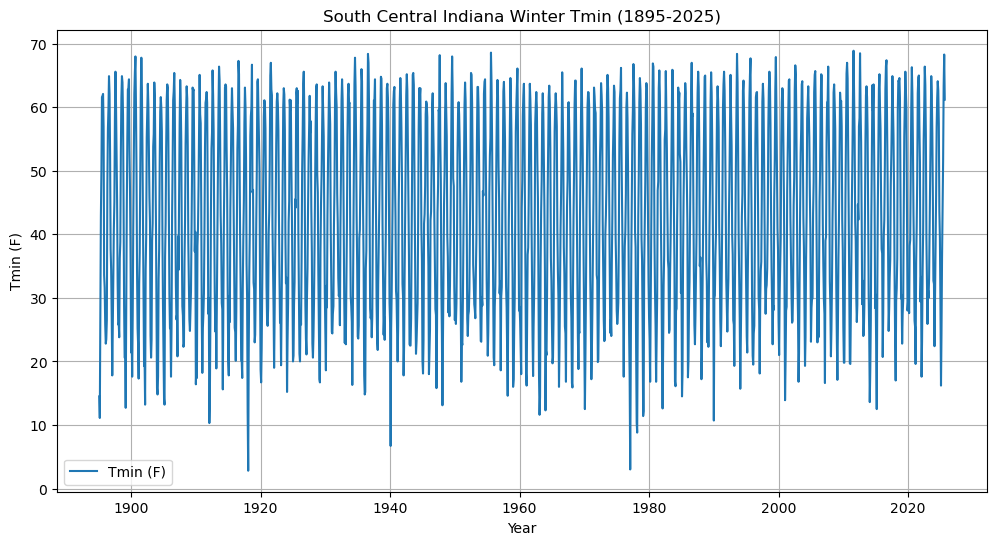

In [73]:
""" Convert the dataset of TMIN to a timeseries. """

# extract the temperature values from ENSO (columns 1 through 12) as a numpy array (rows are year)
tmin_values = filtered_tmin.iloc[:,1:13].to_numpy()

# ravel the temperature values to create a timeseries
tmin_timeseries = tmin_values.ravel()

# deal with missing values (these are coded as 99.90 in the dataset)
missing_value = 99.90
tmin_timeseries = np.where(tmin_timeseries == missing_value, np.nan, tmin_timeseries)

# create a corresponding time vector from Jan 1895 to Dec 2025
time_vector = pd.date_range(start='1895-01', end='2026-01', freq='M')

# show the length of the time vector and the tmin timeseries
print(len(time_vector), len(tmin_timeseries))

# plot the values
plt.figure(figsize=(12,6))
plt.plot(time_vector, tmin_timeseries,label="Tmin (F)", color='tab:blue')
plt.title("South Central Indiana Winter Tmin (1895-2025)")
plt.xlabel("Year")
plt.ylabel("Tmin (F)")
plt.grid()
plt.legend()
plt.show()

In [ ]:
""" Select and average over winter times (DJF). """

# find dates that are in December, January and Feburuary
in_djf = time_vector.month.isin([12,1,2])

# remove the first two values 
tmin_djf = tmin_timeseries[in_djf][2:]
time_vector_djf = time_vector[in_djf][2:]

# group by year (dealing with the fact that December will have a different year than Jan and Feb, and deal with NaNs)
tmin_djf = pd.Series(tmin_djf, index=time_vector_djf).resample('Y').mean()

# plot the timeseries
tmin_djf.plot(figsize=(12,6), label="Tmin (F)", color='tab:blue')
plt.title("South Central Indiana Winter Tmin (DJF) (1897-2025)")
plt.xlabel("Year")
plt.ylabel("Tmin (F)")
plt.grid()
plt.legend()
plt.show()

2004 2004


C:\Users\yejin\AppData\Local\Temp\ipykernel_275708\2221111135.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  time_vector_ENSO = pd.date_range(start='1854-01', end='2021-01', freq='M')


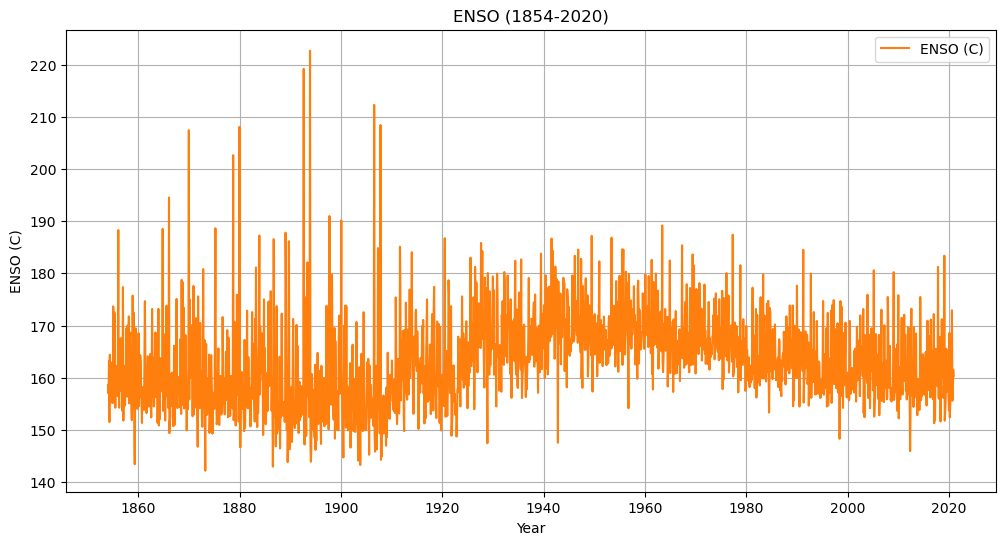

In [74]:
""" Convert the ENSO dataset to a timeseries. """


# extract the temperature values from ENSO (rows 1 through 12) as a numpy array (columns are year) 
ENSO_values = ENSO_data.iloc[1:13, 1:].to_numpy()

#SHOW THE CONTENTS
ENSO_values

# ravel the temperature values to create a timeseries
ENSO_timeseries = ENSO_values.ravel()

# deal with missing values (these are coded as NaN in the dataset)
# --- IGNORE ---

# Create a corresponding time vector from Jan 1854 to May 2020
time_vector_ENSO = pd.date_range(start='1854-01', end='2021-01', freq='M')

# show the length of the time vector and the ENSO timeseries
print(len(time_vector_ENSO), len(ENSO_timeseries))

# plot the values
plt.figure(figsize=(12,6))
plt.plot(time_vector_ENSO, ENSO_timeseries,label="ENSO (C)", color='tab:orange')
plt.title("ENSO (1854-2020)")
plt.xlabel("Year")
plt.ylabel("ENSO (C)")
plt.grid()
plt.legend()
plt.show()

C:\Users\yejin\AppData\Local\Temp\ipykernel_275708\3692332207.py:11: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ENSO_tmin_djf = pd.Series(ENSO_tmin_djf, index=ENSO_time_vector_djf).resample('Y').mean()
C:\Users\yejin\AppData\Local\Temp\ipykernel_275708\3692332207.py:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  ENSO_djf = pd.Series(ENSO_djf, index=ENSO_time_vector_djf).resample('Y').mean()


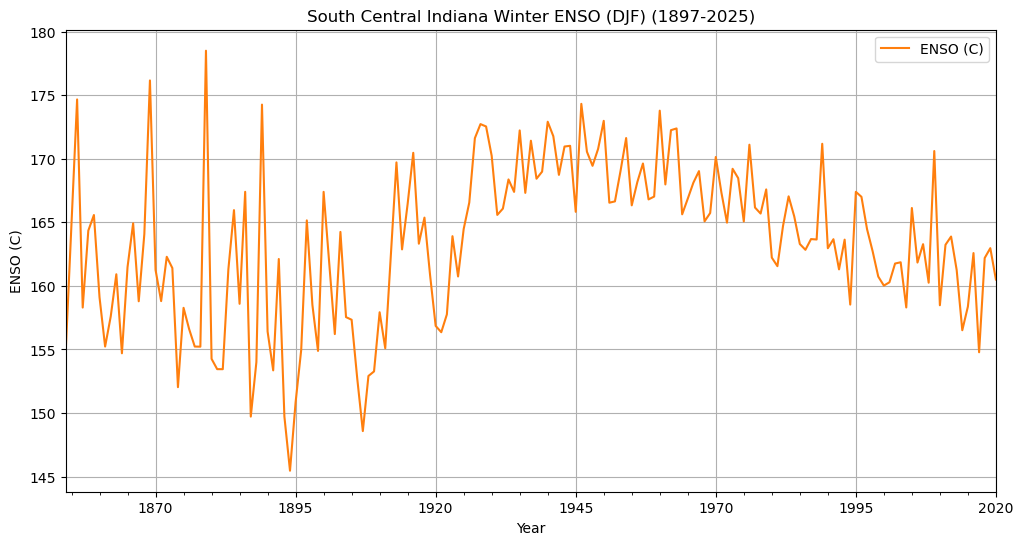

In [81]:
""" Select and average over winter times (DJF) for ENSO as well. """

# find dates that are in December, January and Feburuary
in_djf_ENSO = time_vector_ENSO.month.isin([12,1,2])

# remove the first two values
ENSO_tmin_djf = ENSO_timeseries[in_djf_ENSO][2:]
ENSO_time_vector_djf = time_vector_ENSO[in_djf_ENSO][2:]

# group by year (dealing with the fact that December will have a different year than Jan and Feb, and deal with NaNs)
ENSO_tmin_djf = pd.Series(ENSO_tmin_djf, index=ENSO_time_vector_djf).resample('Y').mean()

# Select and average over winter times (DJF) for ENSO as well.
ENSO_djf = ENSO_timeseries[in_djf_ENSO][2:]
ENSO_time_vector_djf = time_vector_ENSO[in_djf_ENSO][2:]
ENSO_djf = pd.Series(ENSO_djf, index=ENSO_time_vector_djf).resample('Y').mean()

# plot the timeseries
ENSO_djf.plot(figsize=(12,6), label="ENSO (C)", color='tab:orange')
plt.title("South Central Indiana Winter ENSO (DJF) (1897-2025)")
plt.xlabel("Year")
plt.ylabel("ENSO (C)")
plt.grid()
plt.legend()
plt.show()

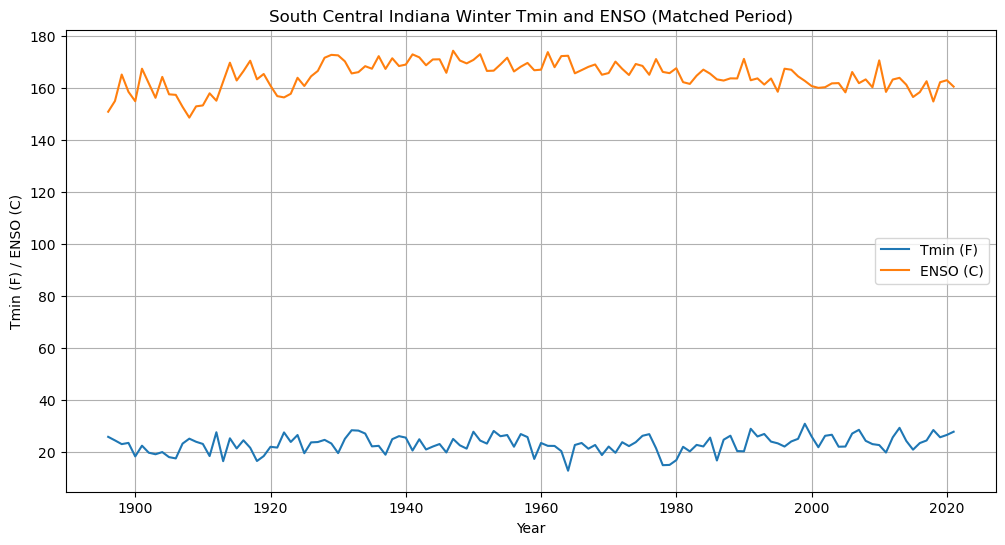

In [82]:
""" Match the timeseries of ENSO and Tmin aligning the time periods. """
# find the start and end dates for the Tmin timeseries
tmin_start = tmin_djf.index[0]
tmin_end = tmin_djf.index[-1]

# find the start and end dates for the ENSO timeseries
enso_start = ENSO_djf.index[0]
enso_end = ENSO_djf.index[-1]

# find the overlapping period
start_date = max(tmin_start, enso_start)
end_date = min(tmin_end, enso_end)
# select the overlapping period for Tmin
tmin_djf_matched = tmin_djf[start_date:end_date]
# select the overlapping period for ENSO
enso_timeseries_matched = ENSO_djf[start_date:end_date]
# plot the matched timeseries

plt.figure(figsize=(12,6))
plt.plot(tmin_djf_matched.index, tmin_djf_matched, label="Tmin (F)", color='tab:blue')
plt.plot(enso_timeseries_matched.index, enso_timeseries_matched, label="ENSO (C)", color='tab:orange')
plt.title("South Central Indiana Winter Tmin and ENSO (Matched Period)")            
plt.xlabel("Year")
plt.ylabel("Tmin (F) / ENSO (C)")
plt.grid()
plt.legend()
plt.show()


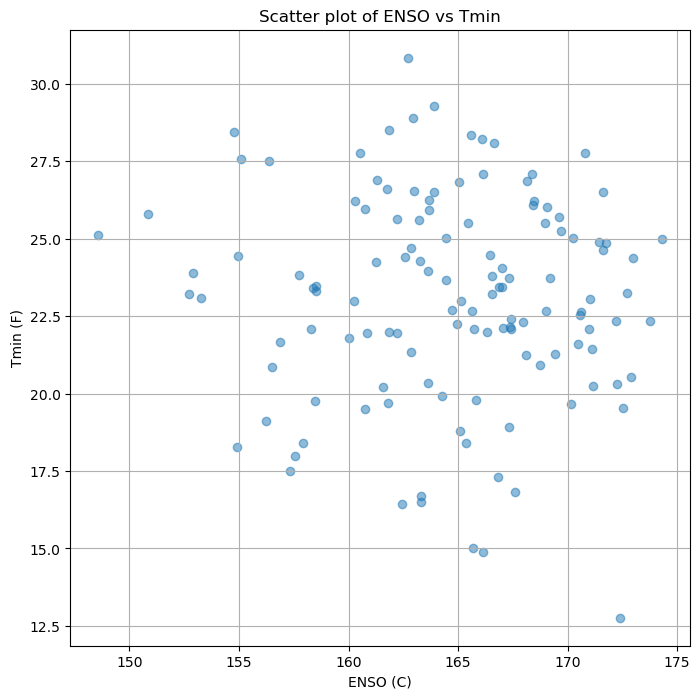

Slope: -0.034147124181102696, Intercept: 28.70962264973243, R-squared: 0.0030454930101944423, P-value: 0.5393769363080461, Std Err: 0.05548200642949145


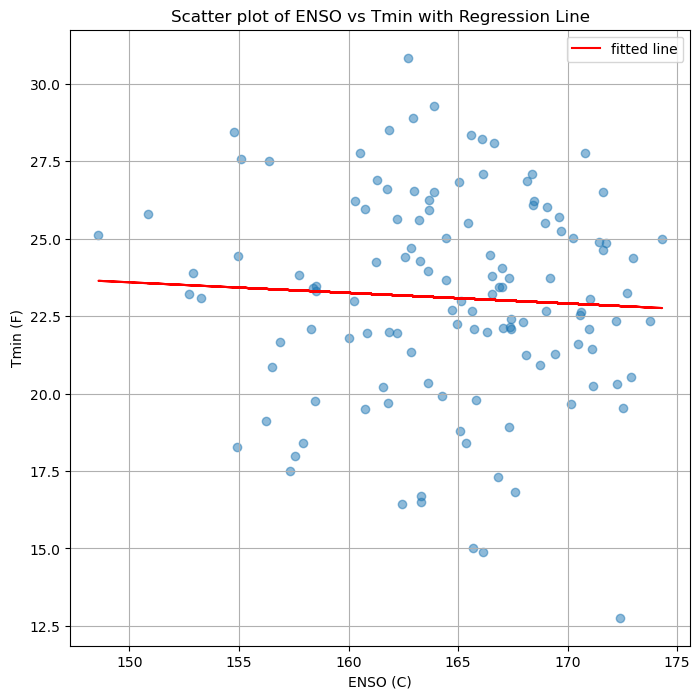

In [86]:
""" Using the matched timeseries, plot the scatters (x axis should be ENSO, y axis should be Tmin), do a linear regression. """

# show me the length of enso_timeseries_matched and tmin_djf_matched
len(enso_timeseries_matched), len(tmin_djf_matched)



plt.figure(figsize=(8,8))
plt.scatter(enso_timeseries_matched, tmin_djf_matched, color='tab:blue', alpha=0.5)
plt.title("Scatter plot of ENSO vs Tmin")   
plt.xlabel("ENSO (C)")
plt.ylabel("Tmin (F)")
plt.grid()
plt.show()

# perform a linear regression
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(enso_timeseries_matched, tmin_djf_matched)
print(f"Slope: {slope}, Intercept: {intercept}, R-squared: {r_value**2}, P-value: {p_value}, Std Err: {std_err}")
# plot the scatter with the regression line
plt.figure(figsize=(8,8))
plt.scatter(enso_timeseries_matched, tmin_djf_matched, color='tab:blue', alpha=0.5)
plt.plot(enso_timeseries_matched, intercept + slope*enso_timeseries_matched, 'r', label='fitted line')
plt.title("Scatter plot of ENSO vs Tmin with Regression Line")
plt.xlabel("ENSO (C)")
plt.ylabel("Tmin (F)")
plt.legend()
plt.grid()
plt.show()